In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,KFold, train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [2]:
data1=pd.read_csv("D:\\Excel R\\Assignments\\Assignment 16\\forestfires.csv")
data1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
d2=data1.drop(data1.iloc[:,11:30],axis=1)
d2

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


<AxesSubplot:>

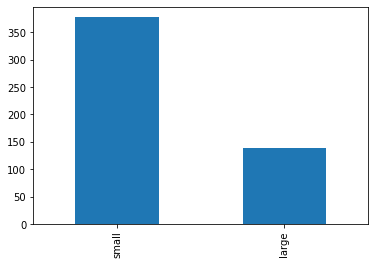

In [5]:
d2.size_category.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='day'>

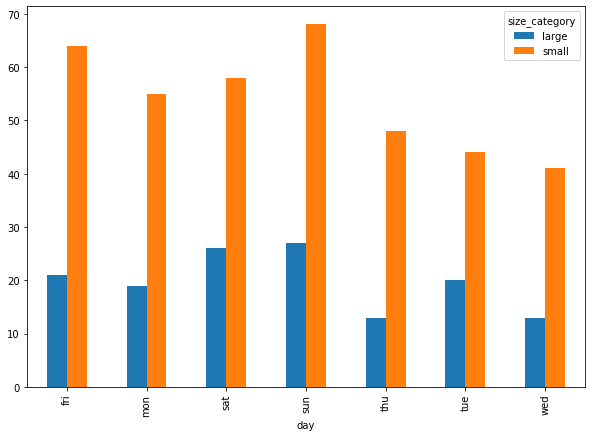

In [6]:
pd.crosstab(d2.day,d2.size_category).plot(kind='bar',figsize=(10,7))

<AxesSubplot:xlabel='month'>

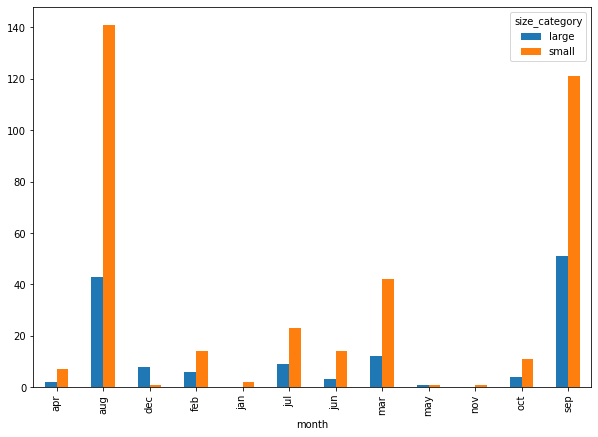

In [7]:
pd.crosstab(d2.month,d2.size_category).plot(kind='bar',figsize=(10,7))

In [8]:
d2.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
                           (1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
d2.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)
d2.size_category.replace(('small','large'),(0,1),inplace=True)
d2

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
512,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,1
513,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,1
514,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,1
515,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0


In [9]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    int64  
 1   day            517 non-null    int64  
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 48.6 KB


In [10]:
d2.describe()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,7.475822,4.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.268859
std,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.443796
min,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000
25%,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000
50%,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000
75%,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,1.000000
max,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000


In [11]:
### Correlation:-
d2.corr()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
month,1.000000,-0.050837,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.056496,0.080316
day,-0.050837,1.000000,-0.041068,0.062870,0.000105,0.032909,0.052190,0.092151,0.032478,-0.048340,0.023226,0.016796
FFMC,0.291477,-0.041068,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.022063
DMC,0.466645,0.062870,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,0.034715
DC,0.868698,0.000105,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,0.019428
ISI,0.186597,0.032909,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,-0.008726
temp,0.368842,0.052190,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,0.006021
RH,-0.095280,0.092151,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,-0.045243
wind,-0.086368,0.032478,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.059113
rain,0.013438,-0.048340,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,0.050001


<AxesSubplot:>

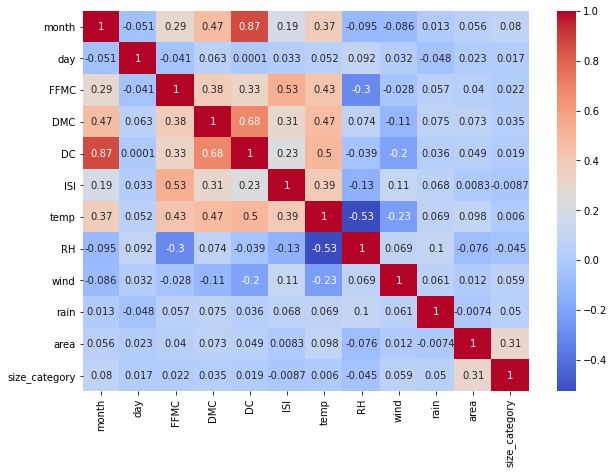

In [12]:
### Heatmap:-
plt.figure(figsize=(10,7))
sns.heatmap(d2.corr(),annot=True,cmap='coolwarm')

<Figure size 720x504 with 0 Axes>

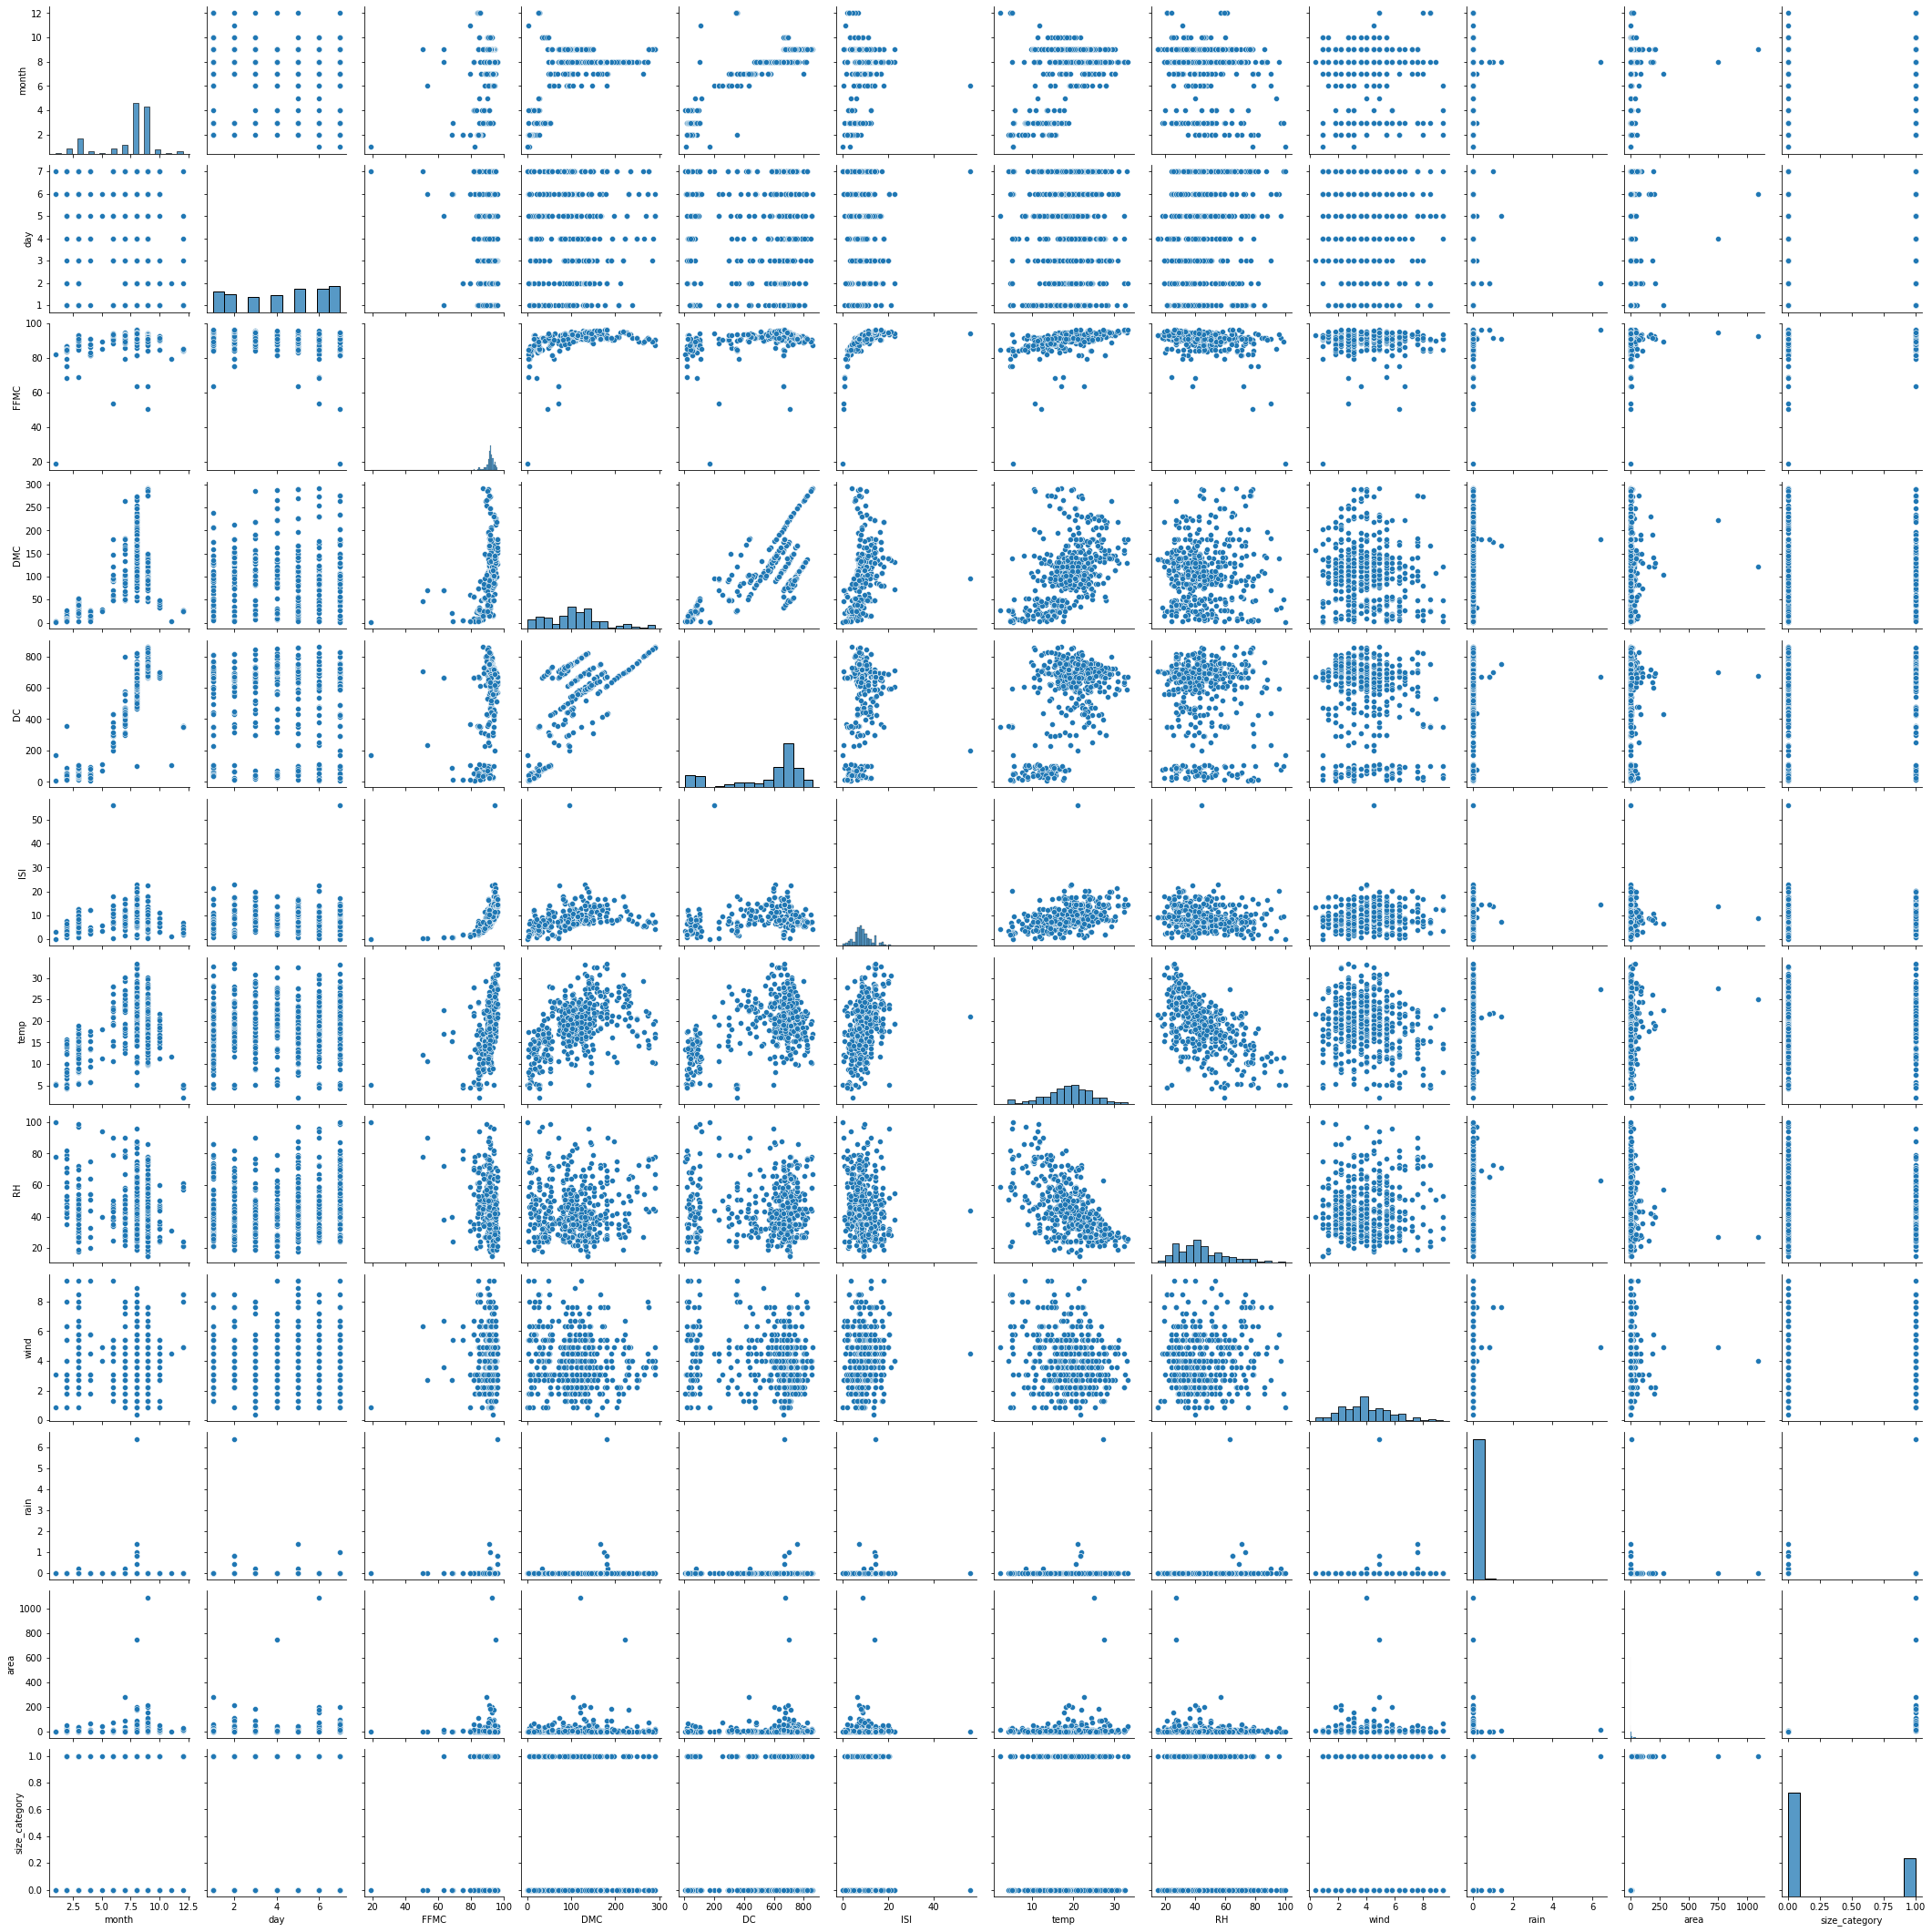

In [13]:
### Pairplot:-
plt.figure(figsize=(10,7))
sns.pairplot(d2)

In [14]:
x=d2.iloc[:,0:11]
y=d2.iloc[:,11]
test=SelectKBest(score_func=mutual_info_regression,k='all')
fit=test.fit(x,y)
print(fit.scores_)

[0.         0.01004126 0.00496798 0.04202807 0.01784385 0.01149296
 0.03439316 0.00922968 0.02318468 0.         0.54212107]


Feature 0: 0.000000
Feature 1: 0.010041
Feature 2: 0.004968
Feature 3: 0.042028
Feature 4: 0.017844
Feature 5: 0.011493
Feature 6: 0.034393
Feature 7: 0.009230
Feature 8: 0.023185
Feature 9: 0.000000
Feature 10: 0.542121


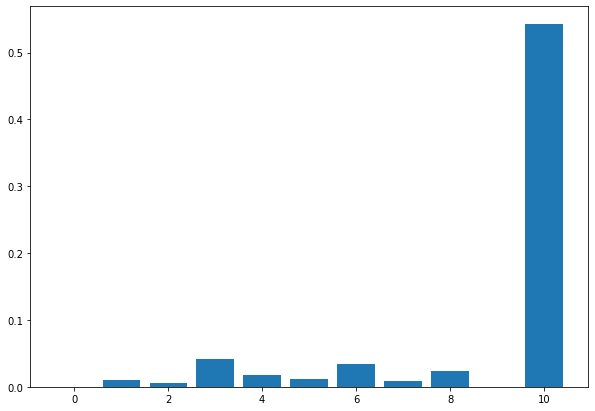

In [15]:
for i in range(len(fit.scores_)):
    print('Feature %d: %f' % (i,fit.scores_[i]))
### Plotting the scores:-
fig,ax=plt.subplots(figsize=(10,7))
plt.bar([i for i in range(len(fit.scores_))],fit.scores_)
plt.show()

In [16]:
sc=StandardScaler()
d3=sc.fit_transform(d2.iloc[:,0:11])
d4=pd.DataFrame(d3)
d4

,0,1,2,3,4,5,6,7,8,9,10
0,-1.968443,0.357721,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020
1,1.110120,-1.090909,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020
2,1.110120,0.840597,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020
3,-1.968443,0.357721,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020
4,-1.968443,1.323474,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020
...,...,...,...,...,...,...,...,...,...,...,...
512,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753
513,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674
514,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532
515,0.230531,0.840597,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020


In [17]:
A=d4.iloc[:,0:11]
B=d2.iloc[:,11]

In [18]:
a_train,a_test,b_train,b_test=train_test_split(A,B,test_size=0.3,random_state=0)

In [19]:
### Creation of the mdoel:-
model=Sequential()
model.add(Dense(12, input_dim=11, kernel_initializer='uniform',activation='relu'))
model.add(Dense(10, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [20]:
### Compilation of model:-
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
### Fitting the model:-
model.fit(a_train,b_train,epochs=100,batch_size=10)

Epoch 1/100
37/37 [==============================] - 2s 3ms/step - loss: 0.6879 - accuracy: 0.7424
Epoch 2/100
37/37 [==============================] - 0s 705us/step - loss: 0.6676 - accuracy: 0.7424
Epoch 3/100
37/37 [==============================] - 0s 695us/step - loss: 0.6235 - accuracy: 0.7424
Epoch 4/100
37/37 [==============================] - 0s 722us/step - loss: 0.5688 - accuracy: 0.7424
Epoch 5/100
37/37 [==============================] - 0s 773us/step - loss: 0.5393 - accuracy: 0.7424
Epoch 6/100
37/37 [==============================] - 0s 786us/step - loss: 0.5221 - accuracy: 0.7424
Epoch 7/100
37/37 [==============================] - 0s 801us/step - loss: 0.5113 - accuracy: 0.7424
Epoch 8/100
37/37 [==============================] - 0s 719us/step - loss: 0.5006 - accuracy: 0.7424
Epoch 9/100
37/37 [==============================] - 0s 743us/step - loss: 0.4911 - accuracy: 0.7424
Epoch 10/100
37/37 [==============================] - 0s 783us/step - loss: 0.4790 - accuracy

In [25]:
### Evaluation of the model:-
scores=model.evaluate(a_test,b_test)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1]*100))

5/5 [==============================] - 0s 1ms/step - loss: 0.0520 - accuracy: 0.9808
accuracy: 98.08%


## Artificial Neural Network Model:- Tuning of all Hyperparameters

In [34]:
def create_model(learning_rate, dropout_rate, activation_function, init, neuron1,neuron2):
    model=Sequential()
    model.add(Dense(neuron1,input_dim=11,kernel_initializer=init, activation=activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim=neuron1,kernel_initializer=init,activation=activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation='sigmoid'))
    
    adam=Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
    return model

### Creation of the model:-
model=KerasClassifier(build_fn=create_model,verbose=0)
    
### Defining the grid search parameters:-
batch_size=[20,40]
epochs=[50,100]
learning_rate=[0.01,0.1]
dropout_rate=[0.1,0.2]
activation_function=['softmax','relu','tahh','linear']
init=['uniform','normal']
neuron1=[4,8]
neuron2=[2,4]

### Making a dictionary of the grid search parameters:-
param_grids=dict(batch_size=batch_size,epochs=epochs, learning_rate=learning_rate, dropout_rate=dropout_rate,
                 activation_function=activation_function, init=init, neuron1=neuron1, neuron2=neuron2)

### Building and then fitting the GridSearchCV:-
grid=GridSearchCV(estimator=model,param_grid=param_grids,cv=KFold(),verbose=10)
grid_result=grid.fit(a_train,b_train)

### Summarize the results:-
print('Best:{}, using{}'.format(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']

for mean,stdev,param in zip(means,stds,params):
    print('{},{} with :{}'.format(mean,stdev,param))

<ipython-input-34-7d9510fcc54c>:14: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model=KerasClassifier(build_fn=create_model,verbose=0)


Fitting 5 folds for each of 512 candidates, totalling 2560 fits
[CV 1/5; 1/512] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 1/512] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.8s
[CV 2/5; 1/512] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 1/512] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.8s
[CV 3/5; 1/512] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 3/5; 1/512] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; t

D:\Python\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Python\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "D:\Python\lib\site-packages\keras\wrappers\scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-34-7d9510fcc54c>", line 3, in create_model
    model.add(Dense(neuron1,input_dim=11,kernel_initializer=init, activation=activation_function))
  File "D:\Python\lib\site-packages\keras\layers\core\dense.py", line 118, in __init__
    self.activation = activations.get(activation)
  F

[CV 1/5; 257/512] END activation_function=tahh, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.3s
[CV 2/5; 257/512] START activation_function=tahh, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 257/512] END activation_function=tahh, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.0s
[CV 3/5; 257/512] START activation_function=tahh, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 3/5; 257/512] END activation_function=tahh, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.0s
[CV 4/5; 257/512] START activation_function=tahh, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 4/5; 257/512] END activation_function=tahh, batc

D:\Python\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Python\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "D:\Python\lib\site-packages\keras\wrappers\scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-34-7d9510fcc54c>", line 3, in create_model
    model.add(Dense(neuron1,input_dim=11,kernel_initializer=init, activation=activation_function))
  File "D:\Python\lib\site-packages\keras\layers\core\dense.py", line 118, in __init__
    self.activation = activations.get(activation)
  F

[CV 1/5; 272/512] END activation_function=tahh, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.0s
[CV 2/5; 272/512] START activation_function=tahh, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 2/5; 272/512] END activation_function=tahh, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.0s
[CV 3/5; 272/512] START activation_function=tahh, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 3/5; 272/512] END activation_function=tahh, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.0s
[CV 4/5; 272/512] START activation_function=tahh, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 4/5; 272/512] END activation_function=tahh, batch_size=20, d

D:\Python\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Python\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "D:\Python\lib\site-packages\keras\wrappers\scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-34-7d9510fcc54c>", line 3, in create_model
    model.add(Dense(neuron1,input_dim=11,kernel_initializer=init, activation=activation_function))
  File "D:\Python\lib\site-packages\keras\layers\core\dense.py", line 118, in __init__
    self.activation = activations.get(activation)
  F

[CV 2/5; 279/512] END activation_function=tahh, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.0s
[CV 3/5; 279/512] START activation_function=tahh, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 3/5; 279/512] END activation_function=tahh, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.0s
[CV 4/5; 279/512] START activation_function=tahh, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 4/5; 279/512] END activation_function=tahh, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.0s
[CV 5/5; 279/512] START activation_function=tahh, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 5/5; 279/512] END activation_function=tahh, batc

D:\Python\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Python\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "D:\Python\lib\site-packages\keras\wrappers\scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-34-7d9510fcc54c>", line 3, in create_model
    model.add(Dense(neuron1,input_dim=11,kernel_initializer=init, activation=activation_function))
  File "D:\Python\lib\site-packages\keras\layers\core\dense.py", line 118, in __init__
    self.activation = activations.get(activation)
  F

[CV 5/5; 286/512] END activation_function=tahh, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.0s
[CV 1/5; 287/512] START activation_function=tahh, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 287/512] END activation_function=tahh, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.0s
[CV 2/5; 287/512] START activation_function=tahh, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 2/5; 287/512] END activation_function=tahh, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   0.0s
[CV 3/5; 287/512] START activation_function=tahh, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 3/5; 287/512] END activation_function=tahh, batch_size

D:\Python\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Python\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "D:\Python\lib\site-packages\keras\wrappers\scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-34-7d9510fcc54c>", line 3, in create_model
    model.add(Dense(neuron1,input_dim=11,kernel_initializer=init, activation=activation_function))
  File "D:\Python\lib\site-packages\keras\layers\core\dense.py", line 118, in __init__
    self.activation = activations.get(activation)
  F

[CV 2/5; 294/512] END activation_function=tahh, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.0s
[CV 3/5; 294/512] START activation_function=tahh, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 3/5; 294/512] END activation_function=tahh, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.0s
[CV 4/5; 294/512] START activation_function=tahh, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 4/5; 294/512] END activation_function=tahh, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.0s
[CV 5/5; 294/512] START activation_function=tahh, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 294/512] END activation_function=tahh, batch_size

D:\Python\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Python\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "D:\Python\lib\site-packages\keras\wrappers\scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-34-7d9510fcc54c>", line 3, in create_model
    model.add(Dense(neuron1,input_dim=11,kernel_initializer=init, activation=activation_function))
  File "D:\Python\lib\site-packages\keras\layers\core\dense.py", line 118, in __init__
    self.activation = activations.get(activation)
  F

[CV 2/5; 309/512] END activation_function=tahh, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.0s
[CV 3/5; 309/512] START activation_function=tahh, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3/5; 309/512] END activation_function=tahh, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.0s
[CV 4/5; 309/512] START activation_function=tahh, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 4/5; 309/512] END activation_function=tahh, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.0s
[CV 5/5; 309/512] START activation_function=tahh, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 5/5; 309/512] END activation_function=tahh, batc

D:\Python\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Python\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "D:\Python\lib\site-packages\keras\wrappers\scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-34-7d9510fcc54c>", line 3, in create_model
    model.add(Dense(neuron1,input_dim=11,kernel_initializer=init, activation=activation_function))
  File "D:\Python\lib\site-packages\keras\layers\core\dense.py", line 118, in __init__
    self.activation = activations.get(activation)
  F

[CV 4/5; 324/512] END activation_function=tahh, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.0s
[CV 5/5; 324/512] START activation_function=tahh, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 5/5; 324/512] END activation_function=tahh, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.0s
[CV 1/5; 325/512] START activation_function=tahh, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 325/512] END activation_function=tahh, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.0s
[CV 2/5; 325/512] START activation_function=tahh, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5; 325/512] END activation_function=tahh, batch_s

D:\Python\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Python\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "D:\Python\lib\site-packages\keras\wrappers\scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-34-7d9510fcc54c>", line 3, in create_model
    model.add(Dense(neuron1,input_dim=11,kernel_initializer=init, activation=activation_function))
  File "D:\Python\lib\site-packages\keras\layers\core\dense.py", line 118, in __init__
    self.activation = activations.get(activation)
  F

[CV 5/5; 331/512] END activation_function=tahh, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.0s
[CV 1/5; 332/512] START activation_function=tahh, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 332/512] END activation_function=tahh, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.0s
[CV 2/5; 332/512] START activation_function=tahh, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 2/5; 332/512] END activation_function=tahh, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.0s
[CV 3/5; 332/512] START activation_function=tahh, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 3/5; 332/512] END activation_function=tahh, batch_size

D:\Python\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Python\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "D:\Python\lib\site-packages\keras\wrappers\scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-34-7d9510fcc54c>", line 3, in create_model
    model.add(Dense(neuron1,input_dim=11,kernel_initializer=init, activation=activation_function))
  File "D:\Python\lib\site-packages\keras\layers\core\dense.py", line 118, in __init__
    self.activation = activations.get(activation)
  F

[CV 1/5; 340/512] END activation_function=tahh, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.0s
[CV 2/5; 340/512] START activation_function=tahh, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 2/5; 340/512] END activation_function=tahh, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.0s
[CV 3/5; 340/512] START activation_function=tahh, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 3/5; 340/512] END activation_function=tahh, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.0s
[CV 4/5; 340/512] START activation_function=tahh, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 4/5; 340/512] END activation_function=tahh

D:\Python\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Python\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "D:\Python\lib\site-packages\keras\wrappers\scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-34-7d9510fcc54c>", line 3, in create_model
    model.add(Dense(neuron1,input_dim=11,kernel_initializer=init, activation=activation_function))
  File "D:\Python\lib\site-packages\keras\layers\core\dense.py", line 118, in __init__
    self.activation = activations.get(activation)
  F

[CV 3/5; 348/512] END activation_function=tahh, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.0s
[CV 4/5; 348/512] START activation_function=tahh, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 4/5; 348/512] END activation_function=tahh, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.0s
[CV 5/5; 348/512] START activation_function=tahh, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 5/5; 348/512] END activation_function=tahh, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.0s
[CV 1/5; 349/512] START activation_function=tahh, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 349/512] END activation_function=tahh, batch

D:\Python\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Python\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "D:\Python\lib\site-packages\keras\wrappers\scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-34-7d9510fcc54c>", line 3, in create_model
    model.add(Dense(neuron1,input_dim=11,kernel_initializer=init, activation=activation_function))
  File "D:\Python\lib\site-packages\keras\layers\core\dense.py", line 118, in __init__
    self.activation = activations.get(activation)
  F

[CV 5/5; 356/512] END activation_function=tahh, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.0s
[CV 1/5; 357/512] START activation_function=tahh, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 357/512] END activation_function=tahh, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.0s
[CV 2/5; 357/512] START activation_function=tahh, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5; 357/512] END activation_function=tahh, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.0s
[CV 3/5; 357/512] START activation_function=tahh, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3/5; 357/512] END activation_function=tahh, batch_siz

D:\Python\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Python\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "D:\Python\lib\site-packages\keras\wrappers\scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-34-7d9510fcc54c>", line 3, in create_model
    model.add(Dense(neuron1,input_dim=11,kernel_initializer=init, activation=activation_function))
  File "D:\Python\lib\site-packages\keras\layers\core\dense.py", line 118, in __init__
    self.activation = activations.get(activation)
  F

[CV 2/5; 365/512] END activation_function=tahh, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.0s
[CV 3/5; 365/512] START activation_function=tahh, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3/5; 365/512] END activation_function=tahh, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.0s
[CV 4/5; 365/512] START activation_function=tahh, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 4/5; 365/512] END activation_function=tahh, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.0s
[CV 5/5; 365/512] START activation_function=tahh, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 5/5; 365/512] END activation_function=tahh, batch_size=40, d

D:\Python\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Python\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "D:\Python\lib\site-packages\keras\wrappers\scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-34-7d9510fcc54c>", line 3, in create_model
    model.add(Dense(neuron1,input_dim=11,kernel_initializer=init, activation=activation_function))
  File "D:\Python\lib\site-packages\keras\layers\core\dense.py", line 118, in __init__
    self.activation = activations.get(activation)
  F

[CV 5/5; 372/512] END activation_function=tahh, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.0s
[CV 1/5; 373/512] START activation_function=tahh, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 373/512] END activation_function=tahh, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.0s
[CV 2/5; 373/512] START activation_function=tahh, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5; 373/512] END activation_function=tahh, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.0s
[CV 3/5; 373/512] START activation_function=tahh, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3/5; 373/512] END activation_function=tahh, bat

D:\Python\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Python\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "D:\Python\lib\site-packages\keras\wrappers\scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-34-7d9510fcc54c>", line 3, in create_model
    model.add(Dense(neuron1,input_dim=11,kernel_initializer=init, activation=activation_function))
  File "D:\Python\lib\site-packages\keras\layers\core\dense.py", line 118, in __init__
    self.activation = activations.get(activation)
  F

[CV 2/5; 381/512] END activation_function=tahh, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.0s
[CV 3/5; 381/512] START activation_function=tahh, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3/5; 381/512] END activation_function=tahh, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.0s
[CV 4/5; 381/512] START activation_function=tahh, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 4/5; 381/512] END activation_function=tahh, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.0s
[CV 5/5; 381/512] START activation_function=tahh, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 5/5; 381/512] END activation_function=tahh, batch_size

D:\Python\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.93363774 0.93633943 0.94752663 0.95296804 0.93093606 0.96396499
 0.94459665 0.93344748 0.95285387 0.9500761  0.94459664 0.93074582
 0.95848553 0.97229831 0.92515221 0.91678082 0.96396497 0.95566971
 0.96396497 0.96392694 0.95844748 0.96404108 0.95019026 0.95300609
 0.96944444 0.97781582 0.96955858 0.96678081 0.96388888 0.96118721
 0.95011414 0.95019026 0.92541857 0.93622526 0.93348553 0.93907915
 0.95300608 0.96678081 0.9085997  0.96122525 0.91423135 0.93896499
 0.92515221 0.92248859 0.91678082 0.9556697  0.89490105 0.92256469
 0.95848553 0.96114916 0.95563165 0.95289192 0.90905631 0.9611872
 0.95566969 0.93907914 0.95570775 0.95285388 0.96396497 0.95015219
 0.95582191 0.96952055 0.91145358 0.95844748 0.92245053 0.90597413
 0.91978691 0.9031583  0.93070775 0.94729831 0.95007609 0.93904109
 0.91411721 0.91149163 0.9142694  0.91967276 0.9391933  0.93337138
 0

Best:0.9861491560935974, using{'activation_function': 'linear', 'batch_size': 20, 'dropout_rate': 0.2, 'epochs': 100, 'init': 'uniform', 'learning_rate': 0.01, 'neuron1': 8, 'neuron2': 4}
0.9336377382278442,0.037323773649491666 with :{'activation_function': 'softmax', 'batch_size': 20, 'dropout_rate': 0.1, 'epochs': 50, 'init': 'uniform', 'learning_rate': 0.01, 'neuron1': 4, 'neuron2': 2}
0.9363394260406495,0.0255911955347262 with :{'activation_function': 'softmax', 'batch_size': 20, 'dropout_rate': 0.1, 'epochs': 50, 'init': 'uniform', 'learning_rate': 0.01, 'neuron1': 4, 'neuron2': 4}
0.9475266337394714,0.0420762482769434 with :{'activation_function': 'softmax', 'batch_size': 20, 'dropout_rate': 0.1, 'epochs': 50, 'init': 'uniform', 'learning_rate': 0.01, 'neuron1': 8, 'neuron2': 2}
0.9529680371284485,0.03343996788410987 with :{'activation_function': 'softmax', 'batch_size': 20, 'dropout_rate': 0.1, 'epochs': 50, 'init': 'uniform', 'learning_rate': 0.01, 'neuron1': 8, 'neuron2': 4}
0

In [35]:
### Creation of the model:-
final_model=Sequential()
final_model.add(Dense(4,input_dim=11,kernel_initializer='normal',activation='linear'))
final_model.add(Dropout(0.1))
final_model.add(Dense(2,input_dim=4,kernel_initializer='normal',activation='linear'))
final_model.add(Dropout(0.1))
final_model.add(Dense(1,activation='sigmoid'))

adam=Adam(learning_rate=0.01)

In [36]:
### Compilation of the model:-
final_model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

In [37]:
### Fitting the model:-
final_model.fit(a_train,b_train,epochs=50,batch_size=40)

Epoch 1/50
10/10 [==============================] - 1s 41ms/step - loss: 0.6620 - accuracy: 0.7036
Epoch 2/50
10/10 [==============================] - 0s 1ms/step - loss: 0.6051 - accuracy: 0.7452
Epoch 3/50
10/10 [==============================] - 0s 889us/step - loss: 0.5589 - accuracy: 0.7507
Epoch 4/50
10/10 [==============================] - 0s 1000us/step - loss: 0.5293 - accuracy: 0.7590
Epoch 5/50
10/10 [==============================] - 0s 1ms/step - loss: 0.4786 - accuracy: 0.7645
Epoch 6/50
10/10 [==============================] - 0s 968us/step - loss: 0.4866 - accuracy: 0.7701
Epoch 7/50
10/10 [==============================] - 0s 863us/step - loss: 0.4569 - accuracy: 0.8061
Epoch 8/50
10/10 [==============================] - 0s 889us/step - loss: 0.4217 - accuracy: 0.8199
Epoch 9/50
10/10 [==============================] - 0s 1ms/step - loss: 0.3974 - accuracy: 0.8393
Epoch 10/50
10/10 [==============================] - 0s 1ms/step - loss: 0.3565 - accuracy: 0.8615
Epoch 1

In [38]:
### Evaluation of the model:-
scores=final_model.evaluate(a_test,b_test)
print('%s: %.2f%%' % (final_model.metrics_names[1], scores[1]*100))

5/5 [==============================] - 0s 1ms/step - loss: 0.0783 - accuracy: 0.9615
accuracy: 96.15%
